# ViT Pilot Run

**Goal:** to demonstrate running the model with ViT and outputting the hidden space from input 

In [2]:
from handwriting_recognition.utils import *
import pandas as pd
import os
# ingest the data
path_to_data = get_dataset_folder_path()
print(path_to_data)
path_to_test = os.path.join(path_to_data, 'pre_processed/test.csv')
print(path_to_test)
test_data = pd.read_csv(path_to_test)
test_data

C:\Users\User\Desktop\handwriting-recognition\dataset
C:\Users\User\Desktop\handwriting-recognition\dataset\pre_processed/test.csv


,file_name,label,file_path
0,TEST_0001.tiff,kevin,D:\Google Drive\Lifestyle\Interests\Coding\Pro...
1,TEST_0002.tiff,clotaire,D:\Google Drive\Lifestyle\Interests\Coding\Pro...
2,TEST_0003.tiff,lena,D:\Google Drive\Lifestyle\Interests\Coding\Pro...
3,TEST_0004.tiff,jules,D:\Google Drive\Lifestyle\Interests\Coding\Pro...
4,TEST_0005.tiff,cherpin,D:\Google Drive\Lifestyle\Interests\Coding\Pro...
...,...,...,...
41060,TEST_41366.tiff,alexane,D:\Google Drive\Lifestyle\Interests\Coding\Pro...
41061,TEST_41367.tiff,pereira-silva,D:\Google Drive\Lifestyle\Interests\Coding\Pro...
41062,TEST_41368.tiff,laurent,D:\Google Drive\Lifestyle\Interests\Coding\Pro...
41063,TEST_41369.tiff,deffense,D:\Google Drive\Lifestyle\Interests\Coding\Pro...


In [16]:
from handwriting_recognition.data_loader import HandWritingDataset
from torch.utils.data import DataLoader
dataloader = DataLoader(HandWritingDataset(path_to_test, None), batch_size=5, shuffle=False)

type(dataloader)

torch.utils.data.dataloader.DataLoader

In [17]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.7781, 0.8475, 0.4430],
        [0.7756, 0.4193, 0.0328],
        [0.2976, 0.0858, 0.6128],
        [0.8024, 0.1707, 0.4132],
        [0.0119, 0.2573, 0.9690]])


In [18]:
for batch in dataloader:
    single_record = batch
    break  # Exit after the first iteration to get just one record

single_record

[tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.]],
 
          [[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.]],
 
          [[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.]]],
 
 
         [[[1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           [1., 1., 1.,  ..., 1., 1., 1.],
           ...,
           [1., 1., 1

In [19]:
type(single_record)

list

In [20]:
from transformers import AutoImageProcessor, ViTModel
import torch

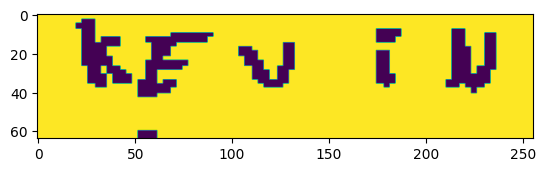

In [21]:
import matplotlib.pyplot as plt
plt.imshow(single_record[0][0][0])
plt.show()

In [22]:
image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")
model = ViTModel.from_pretrained("google/vit-base-patch16-224-in21k")

inputs = image_processor(single_record[0], return_tensors='pt', do_rescale=False)
'''
return_tensors (str or TensorType, optional) — The type of tensors to return. Can be one of:
Unset: Return a list of np.ndarray.
TensorType.TENSORFLOW or 'tf': Return a batch of type tf.Tensor.
TensorType.PYTORCH or 'pt': Return a batch of type torch.Tensor.
TensorType.NUMPY or 'np': Return a batch of type np.ndarray.
TensorType.JAX or 'jax': Return a batch of type jax.numpy.ndarray.
'''

c:\Users\User\AppData\Local\pypoetry\Cache\virtualenvs\handwriting-recognition-mEqlV94N-py3.12\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


"\nreturn_tensors (str or TensorType, optional) — The type of tensors to return. Can be one of:\nUnset: Return a list of np.ndarray.\nTensorType.TENSORFLOW or 'tf': Return a batch of type tf.Tensor.\nTensorType.PYTORCH or 'pt': Return a batch of type torch.Tensor.\nTensorType.NUMPY or 'np': Return a batch of type np.ndarray.\nTensorType.JAX or 'jax': Return a batch of type jax.numpy.ndarray.\n"

In [23]:
# Here is how you get your model configuration
configuration = model.config
configuration

ViTConfig {
  "_name_or_path": "google/vit-base-patch16-224-in21k",
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": true,
  "transformers_version": "4.40.2"
}

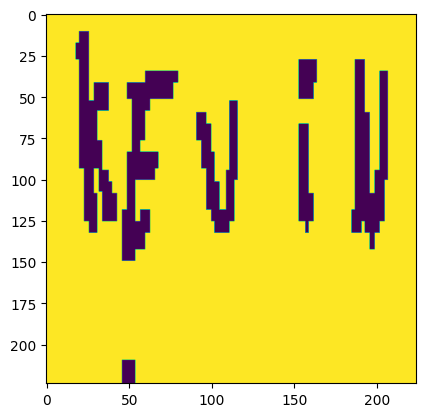

In [24]:
import matplotlib.pyplot as plt
plt.imshow(inputs.pixel_values[0][0])
plt.show()

You need to have the image to be in the format the model was trained on. In this example, it was 224. This is why the above image looks streached. 

In [25]:
with torch.no_grad():
    outputs = model(**inputs)
    # outputs = model(single_record[0]) # <-- example of a failed record.

last_hidden_states = outputs.last_hidden_state
list(last_hidden_states.shape)

[5, 197, 768]

In [26]:
inputs

{'pixel_values': tensor([[[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],

         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]],


        [[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 

In [27]:
last_hidden_states

tensor([[[ 9.7942e-02, -9.9572e-02, -2.1298e-02,  ...,  1.4069e-01,
          -2.0565e-02,  1.2761e-01],
         [-6.0684e-02,  2.0462e-02,  1.0203e-01,  ...,  2.9720e-01,
           1.1994e-02,  2.2446e-01],
         [-1.1405e-01, -9.0036e-02,  1.2728e-01,  ...,  4.1217e-02,
           1.2911e-02,  1.3943e-01],
         ...,
         [-8.8272e-02,  1.8731e-01, -2.9675e-02,  ...,  2.6130e-02,
           6.7744e-02,  1.1876e-01],
         [-1.1568e-01,  1.6134e-01, -3.4536e-03,  ..., -1.9196e-02,
           9.8755e-02,  1.7646e-01],
         [ 4.6801e-02,  1.2641e-01, -5.2413e-04,  ...,  1.2035e-01,
           3.3002e-01,  7.4152e-02]],

        [[ 2.4413e-01, -3.8869e-01, -4.7495e-02,  ...,  2.0549e-01,
           6.7591e-02,  1.9125e-01],
         [ 2.7561e-01, -2.2100e-01, -2.4632e-01,  ...,  1.7990e-01,
           2.1090e-01,  6.8660e-02],
         [-2.8852e-02,  5.9459e-02, -1.9090e-01,  ...,  1.2141e-02,
           2.4954e-01,  3.9832e-03],
         ...,
         [-5.1501e-03, -3

In [15]:
# from handwriting_recognition.model import HandwritingRecognitionModel
# from transformers import ViTConfig, ViTModel, ViTFeatureExtractor, AutoImageProcessor

# preprocess_imgs = ViTFeatureExtractor(imgs) # https://huggingface.co/docs/transformers/en/model_doc/vit#transformers.ViTFeatureExtractor

# # Code from: https://huggingface.co/docs/transformers/en/model_doc/vit
# # Initializing a ViT vit-base-patch16-224 style configuration
# config = ViTConfig()

# # Initializing a model (with random weights) from the vit-base-patch16-224 style configuration
# model = HandwritingRecognitionModel(config)

# # Accessing the model configuration
# configuration = model.config